In [1]:
from requests import get
from bs4 import BeautifulSoup
from time import sleep
from random import randint
from time import time
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
%matplotlib inline

In [2]:
pages = [str(i) for i in range(1, 750)]

In [3]:
model = []
title = []
year = []
km = []
color = []
price = []
post_date = []

In [4]:
for page in pages:
    response = get('https://www.arabam.com/ikinci-el/otomobil?=&city=86&city=85&take=50&page=' + page)
    page_html = BeautifulSoup(response.text, 'html.parser')
    containers = page_html.find_all('tr', class_ = 'listing-list-item pr should-hover bg-white')
    
    for container in containers:
        model_ = container.h3.a.text
        model.append(model_)
        title_ = container.h4.a.text
        title.append(title_)
        year_km_color = container.find_all('td', class_ = 'listing-text pl8 pr8 tac pr', limit = 4)
        year_ = year_km_color[0].text
        year.append(year_)
        km_ = year_km_color[1].text
        km.append(km_)
        color_ = year_km_color[2].text
        color.append(color_)
        price_ = container.find('td', class_ = 'pl8 pr8 tac pr').text
        price.append(price_)
        post_date_ = container.find('td', class_ = 'listing-text tac pr').text
        post_date.append(post_date_)             

In [5]:
df = pd.DataFrame({'Model': model,
'Title': title,
'Year': year,
'KM': km,
'Color': color,
'Price': price,
'Post-Date': post_date
})
df

,Model,Title,Year,KM,Color,Price,Post-Date
0,Renault Symbol 1.5 dCi Joy,SILA OTOMOTİVDEN 2013 MODEL .90.LIK.SYMBOL,2013,182.000,Beyaz,87.500 TL,04 Mayıs 2021
1,Seat Ibiza 1.0 EcoTSI Style,2016 MODEL 71 BIN KMDE OTOMATIK 110 BEYGIR IBI...,2016,71.000,Beyaz,123.000 TL,03 Mayıs 2021
2,Opel Astra 1.6 CDTI Design,2017 OPEL ASTRA OTOMATIK 58 BIN KMDE BOYA HATA...,2017,58.000,Siyah,182.000 TL,03 Mayıs 2021
3,Toyota Auris 1.4 D-4D Active,2013 MODEL OTOMATIK DIZEL AURIS,2013,269.800,Beyaz,115.500 TL,03 Mayıs 2021
4,Chevrolet Cruze 2.0 D LT,2012 CHEVROLET CRUZE 2.0D LT DİZEL OTOMATİK 16...,2012,190.000,Siyah,105.950 TL,03 Mayıs 2021
...,...,...,...,...,...,...,...
37431,Volkswagen Passat 2.0 TDi BlueMotion Highline,Sahibinden Volkswagen Passat 2.0 TDi BlueMotio...,2015,155.000,-,275.000 TL,29 Nisan 2021
37432,Peugeot 301 1.6 HDi Active,Sahibinden Peugeot 301 1.6 HDi Active 2013 Model,2013,153.500,-,94.000 TL,29 Nisan 2021
37433,Chevrolet Cruze 1.6 LS,Sahibinden Chevrolet Cruze 1.6 LS 2009 Model (...,2009,163.000,Beyaz,95.000 TL,29 Nisan 2021
37434,Renault Fluence 1.5 dCi Business,Sahibinden Renault Fluence 1.5 dCi Business 20...,2011,205.000,-,91.000 TL,29 Nisan 2021


In [6]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37436 entries, 0 to 37435
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Model      37436 non-null  object
 1   Title      37436 non-null  object
 2   Year       37436 non-null  object
 3   KM         37436 non-null  object
 4   Color      37436 non-null  object
 5   Price      37436 non-null  object
 6   Post-Date  37436 non-null  object
dtypes: object(7)
memory usage: 2.0+ MB
None


,Model,Title,Year,KM,Color,Price,Post-Date
0,Renault Symbol 1.5 dCi Joy,SILA OTOMOTİVDEN 2013 MODEL .90.LIK.SYMBOL,2013,182.000,Beyaz,87.500 TL,04 Mayıs 2021
1,Seat Ibiza 1.0 EcoTSI Style,2016 MODEL 71 BIN KMDE OTOMATIK 110 BEYGIR IBI...,2016,71.000,Beyaz,123.000 TL,03 Mayıs 2021
2,Opel Astra 1.6 CDTI Design,2017 OPEL ASTRA OTOMATIK 58 BIN KMDE BOYA HATA...,2017,58.000,Siyah,182.000 TL,03 Mayıs 2021
3,Toyota Auris 1.4 D-4D Active,2013 MODEL OTOMATIK DIZEL AURIS,2013,269.800,Beyaz,115.500 TL,03 Mayıs 2021
4,Chevrolet Cruze 2.0 D LT,2012 CHEVROLET CRUZE 2.0D LT DİZEL OTOMATİK 16...,2012,190.000,Siyah,105.950 TL,03 Mayıs 2021


In [7]:
df['Brand'] = df.Model.str.split().str[0]

In [8]:
df['Price'] = df['Price'].str.replace('TL', '')
df['Price'] = df['Price'].str.replace('.', '')
df = df.drop(df[df['Price'].map(len) > 9].index)

In [9]:
df['KM'] = df['KM'].str.replace('.', '')

In [10]:
df['KM'] = df['KM'].astype(int)
df['Price'] = df['Price'].astype(int)
df['Year'] = df['Year'].astype(str).astype(int)
df.head()

,Model,Title,Year,KM,Color,Price,Post-Date,Brand
0,Renault Symbol 1.5 dCi Joy,SILA OTOMOTİVDEN 2013 MODEL .90.LIK.SYMBOL,2013,182000,Beyaz,87500,04 Mayıs 2021,Renault
1,Seat Ibiza 1.0 EcoTSI Style,2016 MODEL 71 BIN KMDE OTOMATIK 110 BEYGIR IBI...,2016,71000,Beyaz,123000,03 Mayıs 2021,Seat
2,Opel Astra 1.6 CDTI Design,2017 OPEL ASTRA OTOMATIK 58 BIN KMDE BOYA HATA...,2017,58000,Siyah,182000,03 Mayıs 2021,Opel
3,Toyota Auris 1.4 D-4D Active,2013 MODEL OTOMATIK DIZEL AURIS,2013,269800,Beyaz,115500,03 Mayıs 2021,Toyota
4,Chevrolet Cruze 2.0 D LT,2012 CHEVROLET CRUZE 2.0D LT DİZEL OTOMATİK 16...,2012,190000,Siyah,105950,03 Mayıs 2021,Chevrolet


In [11]:
len(df[df['Color'] == '-'])

18895

There are no null values in dataframe but some data on Color column has "-" value instead of null. To drop them:

In [12]:
df = df.drop(df[df['Color'] == '-'].index)
df.head()

,Model,Title,Year,KM,Color,Price,Post-Date,Brand
0,Renault Symbol 1.5 dCi Joy,SILA OTOMOTİVDEN 2013 MODEL .90.LIK.SYMBOL,2013,182000,Beyaz,87500,04 Mayıs 2021,Renault
1,Seat Ibiza 1.0 EcoTSI Style,2016 MODEL 71 BIN KMDE OTOMATIK 110 BEYGIR IBI...,2016,71000,Beyaz,123000,03 Mayıs 2021,Seat
2,Opel Astra 1.6 CDTI Design,2017 OPEL ASTRA OTOMATIK 58 BIN KMDE BOYA HATA...,2017,58000,Siyah,182000,03 Mayıs 2021,Opel
3,Toyota Auris 1.4 D-4D Active,2013 MODEL OTOMATIK DIZEL AURIS,2013,269800,Beyaz,115500,03 Mayıs 2021,Toyota
4,Chevrolet Cruze 2.0 D LT,2012 CHEVROLET CRUZE 2.0D LT DİZEL OTOMATİK 16...,2012,190000,Siyah,105950,03 Mayıs 2021,Chevrolet


In [13]:
df = df[['Brand', 'Model', 'Title', 'Year', 'KM', 'Color', 'Price']]
df.head()

,Brand,Model,Title,Year,KM,Color,Price
0,Renault,Renault Symbol 1.5 dCi Joy,SILA OTOMOTİVDEN 2013 MODEL .90.LIK.SYMBOL,2013,182000,Beyaz,87500
1,Seat,Seat Ibiza 1.0 EcoTSI Style,2016 MODEL 71 BIN KMDE OTOMATIK 110 BEYGIR IBI...,2016,71000,Beyaz,123000
2,Opel,Opel Astra 1.6 CDTI Design,2017 OPEL ASTRA OTOMATIK 58 BIN KMDE BOYA HATA...,2017,58000,Siyah,182000
3,Toyota,Toyota Auris 1.4 D-4D Active,2013 MODEL OTOMATIK DIZEL AURIS,2013,269800,Beyaz,115500
4,Chevrolet,Chevrolet Cruze 2.0 D LT,2012 CHEVROLET CRUZE 2.0D LT DİZEL OTOMATİK 16...,2012,190000,Siyah,105950


In [14]:
conditions = [
    (df['KM'] <= 1000),
    (df['KM'] > 1000) & (df['KM'] <= 10000),
    (df['KM'] > 10000) & (df['KM'] <= 50000),
    (df['KM'] > 50000) & (df['KM'] <= 160000),
    (df['KM'] > 160000) & (df['KM'] <= 240000),
    (df['KM'] > 240000)
    ]

# create a list of the cases we want to assign for each condition
cases = ['New', 'Like New','Very Good', 'Good', 'Fair', 'Salvage']

# create a new column and use np.select to assign cases to it using our lists as arguments
df['Condition'] = np.select(conditions, cases)

# display updated DataFrame
df.head()

,Brand,Model,Title,Year,KM,Color,Price,Condition
0,Renault,Renault Symbol 1.5 dCi Joy,SILA OTOMOTİVDEN 2013 MODEL .90.LIK.SYMBOL,2013,182000,Beyaz,87500,Fair
1,Seat,Seat Ibiza 1.0 EcoTSI Style,2016 MODEL 71 BIN KMDE OTOMATIK 110 BEYGIR IBI...,2016,71000,Beyaz,123000,Good
2,Opel,Opel Astra 1.6 CDTI Design,2017 OPEL ASTRA OTOMATIK 58 BIN KMDE BOYA HATA...,2017,58000,Siyah,182000,Good
3,Toyota,Toyota Auris 1.4 D-4D Active,2013 MODEL OTOMATIK DIZEL AURIS,2013,269800,Beyaz,115500,Salvage
4,Chevrolet,Chevrolet Cruze 2.0 D LT,2012 CHEVROLET CRUZE 2.0D LT DİZEL OTOMATİK 16...,2012,190000,Siyah,105950,Fair


In [15]:
df.to_csv('CarList.csv', index=False)

In [16]:
df = pd.read_csv('CarList.csv')

EDA

In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17648 entries, 0 to 17647
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Brand      17648 non-null  object
 1   Model      17648 non-null  object
 2   Title      17648 non-null  object
 3   Year       17648 non-null  int64 
 4   KM         17648 non-null  int64 
 5   Color      17648 non-null  object
 6   Price      17648 non-null  int64 
 7   Condition  17648 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.1+ MB
None


In [18]:
df.Price.describe()

count     17648.000000
mean     183009.450136
std      103105.566671
min       12000.000000
25%      117000.000000
50%      148000.000000
75%      245750.000000
max      999950.000000
Name: Price, dtype: float64

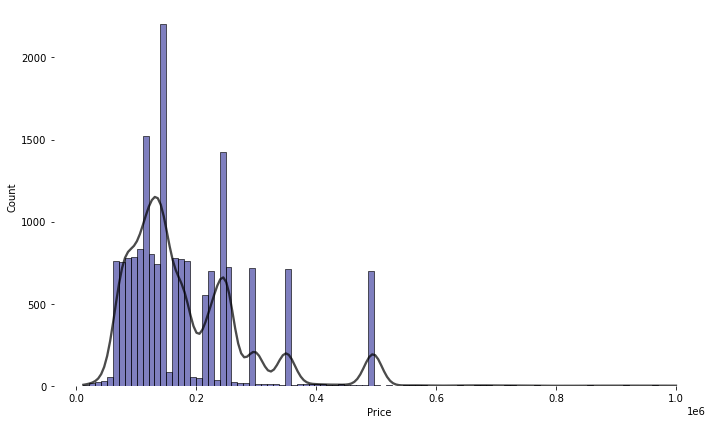

In [19]:
d = sns.displot(data = df, x = 'Price', legend = False, height=6, aspect=10/6, kde = True, color = 'navy')
plt.setp(d.ax.lines, alpha=.7, linewidth = 2.3, color = 'black')
plt.style.use('fivethirtyeight')
plt.box(False)
plt.show()

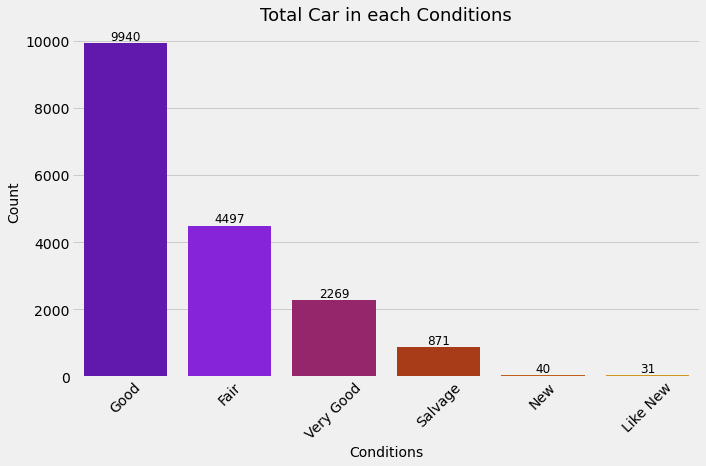

In [20]:
labels = df['Condition'].value_counts().index
values = df['Condition'].value_counts().values

plt.figure(figsize = (10, 6))
ax = sns.barplot(x = labels, y = values, palette = "gnuplot")
for i, val in enumerate(values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
plt.title("Total Car in each Conditions", fontsize = 18)
plt.xlabel("Conditions", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.style.use('fivethirtyeight')
plt.box(False)
xticks(rotation = 45)
plt.show()

# Let's see average price of cars in each symbol category.

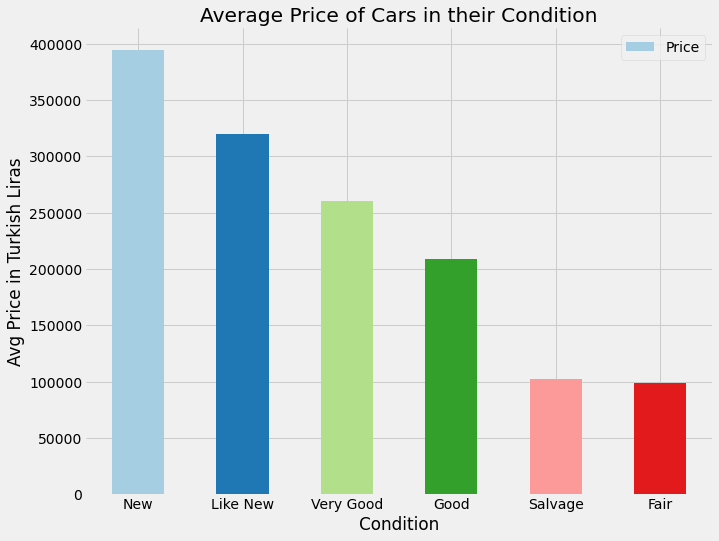

In [21]:
con_price = df[['Condition', 'Price']].groupby("Condition").mean().astype(int).sort_values('Price', ascending=False)

con_price.plot(kind = 'bar', 
               figsize = (10, 8), 
               title = "Average Price of Cars in their Condition", 
               color = [plt.cm.Paired(np.arange(len(df)))])

plt.style.use('fivethirtyeight')
plt.box(False)
plt.xlabel("Condition")
plt.ylabel("Avg Price in Turkish Liras")
xticks(rotation = 0)
plt.show()

In [22]:
df.Brand.describe()

count       17648
unique         41
top       Renault
freq         2413
Name: Brand, dtype: object

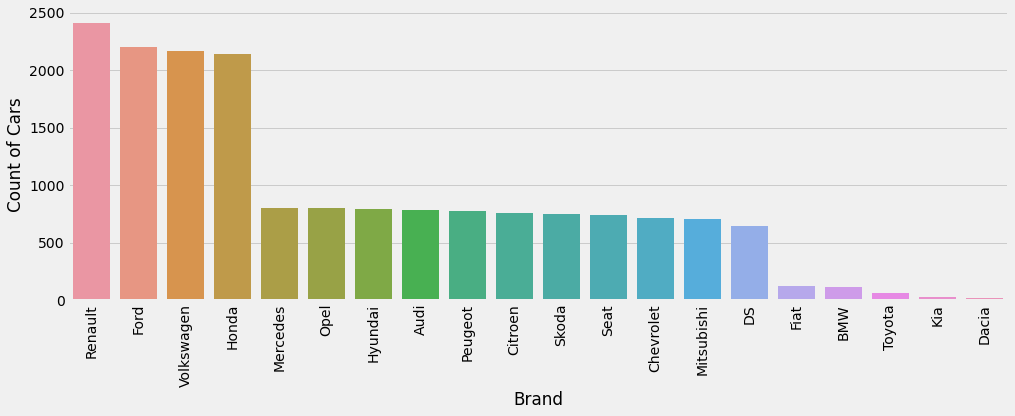

In [23]:
fig, ax = plt.subplots(figsize = (15,5))
ax = sns.countplot(x = 'Brand', data = df, order = df.value_counts(df['Brand']).iloc[:20].index)
ax.set_xlabel('Brand')
ax.set_ylabel('Count of Cars')
xticks(rotation = 90)
plt.show()

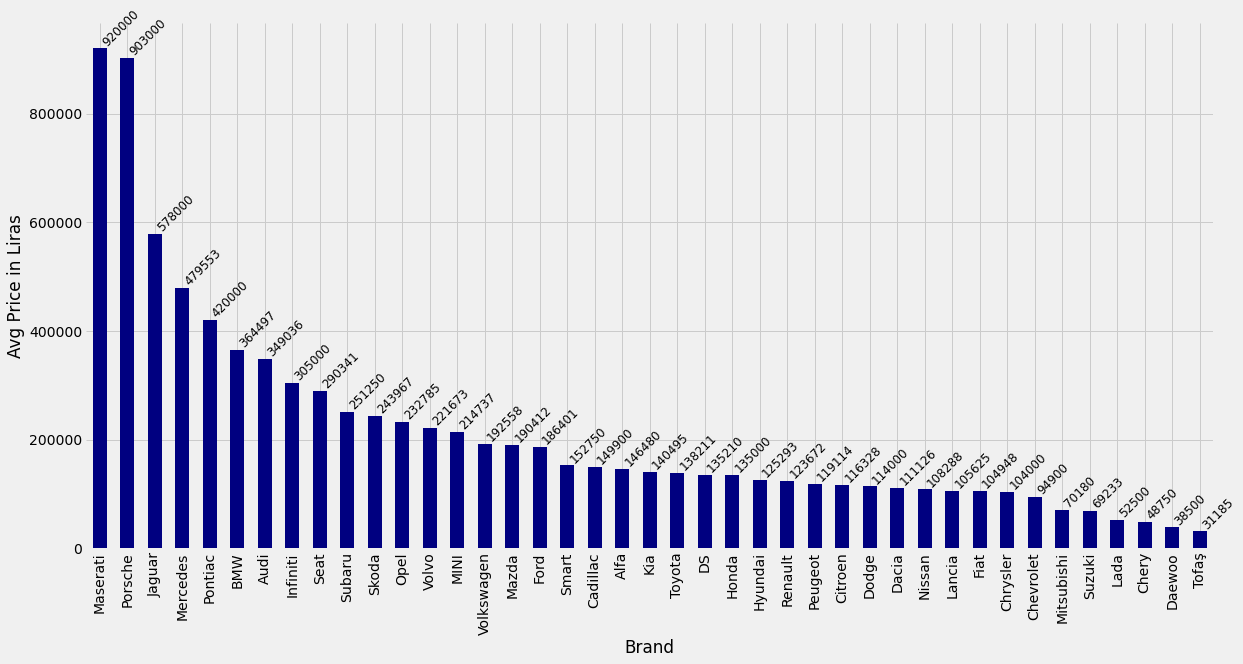

In [24]:
df_comp_avg_price = df[['Brand','Price']].groupby("Brand", as_index = False).mean().rename(columns={'Price':'brand_avg_price'}).sort_values('brand_avg_price', ascending=False)

df_comp_avg_price.plot(x = 'Brand', kind='bar',legend = False, sort_columns = False, figsize = (18,9), color = 'navy')

for i, val in enumerate(df_comp_avg_price['brand_avg_price']):
    plt.text(i, val, int(val), horizontalalignment='left', verticalalignment='bottom', rotation=45, fontdict={'fontweight':500, 'size':12})

plt.style.use('fivethirtyeight')
plt.box(False)
plt.xlabel("Brand")
plt.ylabel("Avg Price in Liras")
xticks(rotation = 90)
plt.show()

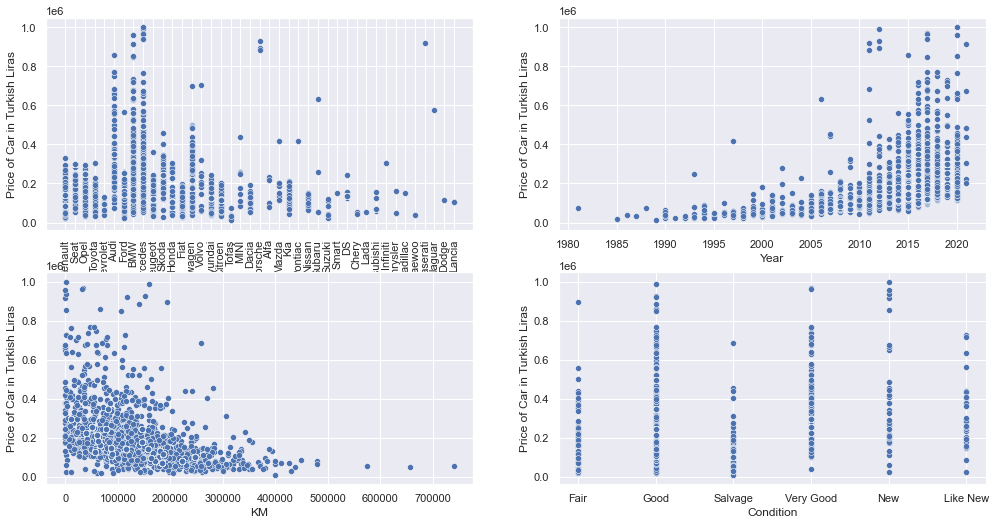

In [25]:
sns.set(font_scale = 1)
fig, axs = plt.subplots(2,2,figsize=(15, 8))
plt1 = sns.scatterplot(x = 'Brand', y = 'Price', data = df, ax = axs[0,0])
plt1.tick_params(axis='x', rotation=90)
plt1.set_xlabel('Brand')
plt1.set_ylabel('Price of Car in Turkish Liras')
plt2 = sns.scatterplot(x = 'Year', y = 'Price', data = df, ax = axs[0,1])
plt2.set_xlabel('Year')
plt2.set_ylabel('Price of Car in Turkish Liras')
plt3 = sns.scatterplot(x = 'KM', y = 'Price', data = df, ax = axs[1,0])
plt3.set_xlabel('KM')
plt3.set_ylabel('Price of Car in Turkish Liras')
plt4 = sns.scatterplot(x = 'Condition', y = 'Price', data = df, ax = axs[1,1])
plt4.set_xlabel('Condition')
plt4.set_ylabel('Price of Car in Turkish Liras')
plt.style.use('fivethirtyeight')
plt.show()

Linear Regression

Data Preparation

Label Encoding and One Hot Encoding

To apply Label encoding, the dependance between feature and target must be linear in order for Label Encoding to be utilised effectively.
Similarly, in case the dependance is non-linear, you might want to use OHE for the same. Basically, LabelEncoder is for ordinal data, while OHE is for nominal data. One-hot encoding transforms categorical features to a format that works better with classification and regression algorithms.

In [26]:
brand_corr = df.Brand.str.get_dummies(sep=' ').corrwith(df.Price)
brand_corr[:5]

Alfa       -0.005964
Audi        0.346509
BMW         0.140676
Cadillac   -0.002417
Chery      -0.013863
dtype: float64

In [27]:
con_corr = df.Condition.str.get_dummies(sep=' ').corrwith(df.Price)
con_corr

Fair      -0.479593
Good       0.520685
Like       0.055659
New        0.110276
Salvage   -0.177368
Very       0.289539
dtype: float64

In [28]:
df['KM'].corr(df['Price'])

-0.5726826902912907

As expected there is a non-linear relationship between features and the target value. Therefore, we will use one hot encoding to make categorical to numerical.

Will perform Linear Regression, KNN and Random Forest models.

Linear Regression

Label Encoding

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [30]:
X = df[['Brand', 'Year', 'KM', 'Condition']]
y = df.Price

In [31]:
ohe = OneHotEncoder(sparse = False)
column_trans = make_column_transformer(
    (OneHotEncoder(), ['Brand', 'Year', 'KM', 'Condition']))
X = column_trans.fit_transform(X)

In [32]:
print('X:', type(X), X.shape)
print('y:', type(y), y.shape)

X: <class 'scipy.sparse.csr.csr_matrix'> (17648, 735)
y: <class 'pandas.core.series.Series'> (17648,)


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=5)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (14118, 735) (14118,)
Test set: (3530, 735) (3530,)


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lr = LinearRegression()
lr.fit(X_train, y_train)
print ('Coefficients: ', lr.coef_[:5])
print ('Intercept: ',lr.intercept_)

Coefficients:  [ -53984.36710057  115931.42850222  124439.15741484       0.
 -108847.47136325]
Intercept:  201587.99093199155


In [35]:
y_pred = lr.predict(X_test)
print("The first five prediction {}".format(y_pred[:5]))
print("The real first five labels {}".format(y_test[:5]))

The first five prediction [244523.38808949 104637.0554283  104637.0554283   69915.88888471
 162907.5489398 ]
The real first five labels 13917    245750
9614     105000
2302     105000
10641     70000
9678     163000
Name: Price, dtype: int64


In [36]:
lr.score(X_test, y_test)

0.9136218783556288

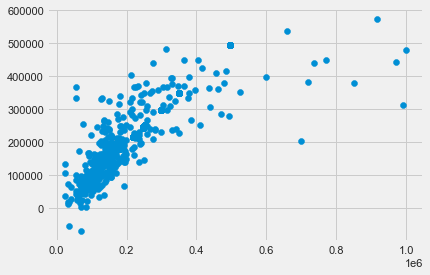

In [37]:
plt.scatter(y_test, y_pred)

In [38]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [39]:
test_pred = lr.predict(X_test)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)

Test set evaluation:

MAE: 6005.490595132653
MSE: 973442271.8644301
RMSE: 31200.036408062573
R2 Square 0.9136218783556288
__________________________________


R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MaxAbsScaler

In [41]:
scaler = MaxAbsScaler()   
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    std_acc[n-1] = np.std(y_pred == yhat)/np.sqrt(yhat.shape[0])

mean_acc

array([0.90226629, 0.901983  , 0.90169972, 0.901983  , 0.901983  ,
       0.901983  , 0.901983  , 0.901983  , 0.901983  , 0.901983  ,
       0.901983  , 0.901983  , 0.901983  , 0.901983  ])

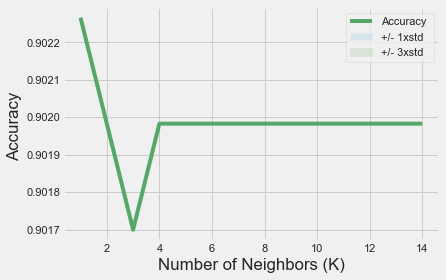

In [43]:
plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1, Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1, Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.show()

Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
rf = RandomForestRegressor(n_estimators=50, random_state=5)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=5)

In [46]:
yhat_rf = rf.predict(X_test)

print('Test set evaluation:\n')
print_evaluate(y_test, yhat_rf)

Test set evaluation:

MAE: 4815.835441035938
MSE: 756459613.8843483
RMSE: 27503.810897480158
R2 Square 0.9328757724667043
__________________________________


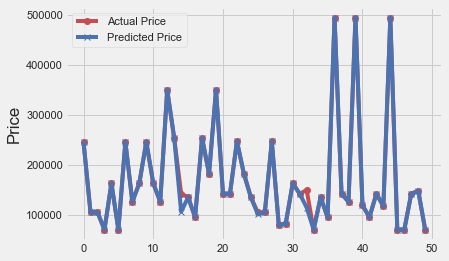

In [47]:
samples = 50
y_samples = random.sample(range(len(y_test)), samples) 
plt.plot(range(samples), y_test[:50], 'ro-')
plt.plot(range(samples), yhat_rf[:50], 'bx-')
plt.ylabel("Price")
plt.legend(["Actual Price", 'Predicted Price'])